In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = pd.read_csv("DATA/Standard_Scaler_result.csv",encoding="cp949")
data.head()

,CUSTNO,GNO,CBSCORE,CBSCOREGRD,CREDITOTAMT,YSALEAMT,ESTMM,ASSETAMT,IMSAAMT,IMJUAMT,...,환율,GDP,소상공인체감지수,실업률,물가지수,국고채,금리,유가등락률,소비자심리지수,ONEHOT
0,475821,l180202101898,1.483693,-1.008776,-0.182324,5.599410,-0.351065,-0.497246,-0.176818,-0.327516,...,-0.068090,2.274533,-1.302456,-0.290076,2.728294,-1.492204,-3.801670,2.712699,1.300530,3
1,74417,l230201700120,0.436620,-0.269293,-0.187359,3.004204,-0.774902,-0.434147,-0.395499,0.047573,...,0.509001,-1.236236,-1.058419,0.571922,-0.733929,-0.363940,-0.649856,1.705658,-1.167094,8
2,387787,l110201603233,0.682990,-1.008776,-0.283032,1.765241,1.889216,-0.497246,-0.176818,-0.327516,...,0.991659,-1.589789,0.853200,-0.290076,-1.872513,-0.546902,-0.649856,0.170943,-0.965339,7
3,395418,l230201700254,0.169719,-0.269293,-0.212536,1.647960,-0.744628,-0.497246,-0.176818,-0.327516,...,0.490639,-1.236236,1.219254,-0.721075,-0.788147,-0.241965,-0.649856,0.665173,-0.810142,3
4,190372,l200201601418,-3.033092,2.688638,-0.247784,0.478163,1.616749,-0.202785,-0.351763,-0.327516,...,0.409321,-1.809655,-0.102610,-0.721075,-2.530877,-1.736154,-0.649856,-0.958727,-0.142797,7


In [25]:
data['intercept'] = 1

lm = sm.OLS(data['ACTCD'], data[[ 'intercept', 'CBSCORE', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM', 'IMSAAMT', 'IMJUAMT',  'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'GKIND',  '환율', 'GDP', 
        '국고채', '유가등락률', 'ONEHOT']]) 
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ACTCD   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     168.1
Date:                Tue, 21 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:41:46   Log-Likelihood:                -5568.3
No. Observations:               39117   AIC:                         1.117e+04
Df Residuals:                   39101   BIC:                         1.131e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.1075      0.004     26.406      0.000       0.100       0.115
CBSCORE        -0.0480      0.002    -29.323      0.000      -0.051      -0.045
CREDITOTAMT     0.0058      0.001      3.881      0.000       0.003       0.009
YSALEAMT        0.0083      0.002      5.256      0.000       0.005       0.011
ESTMM          -0.0228      0.002    -15.021      0.000      -0.026      -0.020
IMSAAMT        -0.0028      0.001     -1.921      0.055      -0.006    5.63e-05
IMJUAMT        -0.0086      0.001     -5.954      0.000      -0.011      -0.006
BUJUAMT        -0.0153      0.001    -10.416      0.000      -0.018      -0.012
BU1TOTAMT       0.0048      0.001      3.207      0.001       0.002       0.008
GAMT           -0.0072      0.002     -3.971      0.000      -0.011      -0.004
GKIND           0.0046      0.002      2.757      0.006       0.001       0.008
환율              0.0059      0.002      2.544      0.011       0.001       0.010
GDP            -0.0253      0.001    -16.951      0.000      -0.028      -0.022
국고채             0.0097      0.002      3.973      0.000       0.005       0.014
유가등락률           0.0046      0.002      2.820      0.005       0.001       0.008
ONEHOT         -0.0025      0.000     -7.785      0.000      -0.003      -0.002
==============================================================================
Omnibus:                    19693.786   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90089.052
Skew:                           2.581   Prob(JB):                         0.00
Kurtosis:                       8.351   Cond. No.                         31.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
features = data[['CBSCORE', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM',  'IMSAAMT', 'IMJUAMT', 'BUSAAMT', 'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'LABORCNT', 'KOSPI', '환율', 'GDP', 
       '소상공인체감지수', '실업률', '물가지수', '국고채', '금리', '유가등락률',
       '소비자심리지수','ONEHOT']]
act = data['ACTCD']

In [27]:
act = act - 1
act = act * -1

In [28]:
from sklearn.model_selection import train_test_split

train_x, test_x,train_y, test_y = train_test_split(features, act,
stratify=act,train_size=0.7,test_size=0.3,random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(27381, 22) (11736, 22) (27381,) (11736,)


In [29]:
from imblearn.over_sampling import BorderlineSMOTE, ADASYN
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek

#언더 샘플링
enn = EditedNearestNeighbours(kind_sel="all", n_neighbors=10)
tomekl = TomekLinks()

#오버 샘플링
bsmote = BorderlineSMOTE(random_state=42)
adasyn = ADASYN(random_state=42)

#혼합 샘플링
smotee = SMOTEENN(random_state=42)
smoteT = SMOTETomek(random_state=42)


X_under1_train, Y_under1_train = enn.fit_resample(train_x, train_y)
X_under2_train, Y_under2_train = tomekl.fit_resample(train_x, train_y)

X_over1_train, Y_over1_train = bsmote.fit_resample(train_x,train_y)
X_over2_train, Y_over2_train = adasyn.fit_resample(train_x,train_y)

X_comb1_train, Y_comb1_train = smotee.fit_resample(train_x, train_y)
X_comb2_train, Y_comb2_train = smoteT.fit_resample(train_x, train_y)

### 아래 분석 결과, Logistic Regression 하이퍼 파라미터: C와 max_iter 조정 결과 변화 없음

## 오버샘플링

1. BorderlineSMOTE

In [5]:
# 임계값 함수

def cut_off(y, threshold) :
    Y = y.copy()  # 대문자 Y를 새로운 변수로 하여 기존의 y값에 영향이 가지 않도록 한다.
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)

from sklearn.metrics import confusion_matrix
# confusion matrix accuracy(정확도) 계산함수

def acc(cfmat):
    return (cfmat[0,0] + cfmat[1,1])/(cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])

In [9]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score

anal_result = []
m = [1000, 1500, 2000, 2500, 3000]
c = [0.01, 0.1, 1, 10, 100]

for i in m:
    model = LogisticRegression(random_state = 42, solver = 'lbfgs', max_iter = i)
    results = model.fit(X_over1_train,Y_over1_train)
    
    #로지스틱 모형 적합
    model = sm.Logit(Y_over1_train,X_over1_train)
    results = model.fit()

    pred_y = results.predict(test_x)
    pred_Y = cut_off(pred_y, 0.5)

    cfmat = confusion_matrix(test_y,pred_Y)
    accuracy = acc(cfmat)

    pr = precision_score(test_y,pred_Y)
    r = recall_score(test_y,pred_Y)
    f1= f1_score(test_y,pred_Y)
    auc_score = roc_auc_score(test_y,pred_y)
    
    anal_result.append((i, accuracy, cfmat, pr, r, f1, auc_score))

Optimization terminated successfully.
         Current function value: 0.579274
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579274
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579274
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579274
         Iterations 5


In [30]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score

model = LogisticRegression()
results = model.fit(X_over1_train,Y_over1_train)
model = sm.Logit(Y_over1_train,X_over1_train)
results = model.fit()
pred_y = results.predict(test_x)
pred_Y = cut_off(pred_y, 0.5)
cfmat = confusion_matrix(test_y,pred_Y)
print(cfmat)
print(classification_report(test_y, pred_Y, target_names=['사고보증', '정상보증']))

Optimization terminated successfully.
         Current function value: 0.550403
         Iterations 6
[[ 722  348]
 [3242 7424]]
              precision    recall  f1-score   support

        사고보증       0.18      0.67      0.29      1070
        정상보증       0.96      0.70      0.81     10666

    accuracy                           0.69     11736
   macro avg       0.57      0.69      0.55     11736
weighted avg       0.88      0.69      0.76     11736



In [10]:
print(anal_result)

[(1500, 0.5389400136332652, array([[5446, 5220],
       [ 191,  879]], dtype=int64), 0.1441219872110182, 0.8214953271028037, 0.24522248570232946, 0.7491535247822146), (2000, 0.5389400136332652, array([[5446, 5220],
       [ 191,  879]], dtype=int64), 0.1441219872110182, 0.8214953271028037, 0.24522248570232946, 0.7491535247822146), (2500, 0.5389400136332652, array([[5446, 5220],
       [ 191,  879]], dtype=int64), 0.1441219872110182, 0.8214953271028037, 0.24522248570232946, 0.7491535247822146), (3000, 0.5389400136332652, array([[5446, 5220],
       [ 191,  879]], dtype=int64), 0.1441219872110182, 0.8214953271028037, 0.24522248570232946, 0.7491535247822146)]


2. ADASYN

In [11]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score

anal_result = []
m = [1000, 1500, 2000, 2500, 3000]
c = [0.01, 0.1, 1, 10, 100]

for i in m:
    model = LogisticRegression(random_state = 42, solver = 'lbfgs', max_iter = 1000, C = i)
    results = model.fit(X_over2_train,Y_over2_train)
    
    #로지스틱 모형 적합
    model = sm.Logit(Y_over2_train,X_over2_train)
    results = model.fit()

    pred_y = results.predict(test_x)
    pred_Y = cut_off(pred_y, 0.5)

    cfmat = confusion_matrix(test_y,pred_Y)
    accuracy = acc(cfmat)

    pr = precision_score(test_y,pred_Y)
    r = recall_score(test_y,pred_Y)
    f1= f1_score(test_y,pred_Y)
    auc_score = roc_auc_score(test_y,pred_y)
    
    anal_result.append((i, accuracy, cfmat, pr, r, f1, auc_score))

Optimization terminated successfully.
         Current function value: 0.611243
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.611243
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.611243
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.611243
         Iterations 5


In [31]:
model = LogisticRegression()
results = model.fit(X_over2_train,Y_over2_train)
model = sm.Logit(Y_over2_train,X_over2_train)
results = model.fit()
pred_y = results.predict(test_x)
pred_Y = cut_off(pred_y, 0.5)
cfmat = confusion_matrix(test_y,pred_Y)
print(cfmat)
print(classification_report(test_y, pred_Y, target_names=['사고보증', '정상보증']))

Optimization terminated successfully.
         Current function value: 0.595659
         Iterations 6
[[ 779  291]
 [3647 7019]]
              precision    recall  f1-score   support

        사고보증       0.18      0.73      0.28      1070
        정상보증       0.96      0.66      0.78     10666

    accuracy                           0.66     11736
   macro avg       0.57      0.69      0.53     11736
weighted avg       0.89      0.66      0.74     11736



In [12]:
print(anal_result)

[(1500, 0.5328902522154055, array([[5363, 5303],
       [ 179,  891]], dtype=int64), 0.1438488860187278, 0.8327102803738318, 0.2453193832599119, 0.7484908373362121), (2000, 0.5328902522154055, array([[5363, 5303],
       [ 179,  891]], dtype=int64), 0.1438488860187278, 0.8327102803738318, 0.2453193832599119, 0.7484908373362121), (2500, 0.5328902522154055, array([[5363, 5303],
       [ 179,  891]], dtype=int64), 0.1438488860187278, 0.8327102803738318, 0.2453193832599119, 0.7484908373362121), (3000, 0.5328902522154055, array([[5363, 5303],
       [ 179,  891]], dtype=int64), 0.1438488860187278, 0.8327102803738318, 0.2453193832599119, 0.7484908373362121)]


# 언더샘플링

1. EditedNearestNeighbours

In [13]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score

pr = precision_score(test_y,pred_Y)
print("precision : ",pr)
r = recall_score(test_y,pred_Y)
print("recall : ",r)
f1= f1_score(test_y,pred_Y)
print("f1_score:",f1)
auc_score = roc_auc_score(test_y,pred_y)
print("auc_score : ",auc_score)

precision :  0.1438488860187278
recall :  0.8327102803738318
f1_score: 0.2453193832599119
auc_score :  0.7484908373362121


In [50]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score

anal_result = []
m = [1000, 1500, 2000, 2500, 3000]
c = [0.01, 0.1, 1, 10, 100]

for i in m:
    model = LogisticRegression(random_state = 42, solver = 'lbfgs', max_iter = i)
    results = model.fit(X_under1_train,Y_under1_train)
    
    #로지스틱 모형 적합
    model = sm.Logit(Y_under1_train,X_under1_train)
    results = model.fit()

    pred_y = results.predict(test_x)
    pred_Y = cut_off(pred_y, 0.5)

    cfmat = confusion_matrix(test_y,pred_Y)
    accuracy = acc(cfmat)

    pr = precision_score(test_y,pred_Y)
    r = recall_score(test_y,pred_Y)
    f1= f1_score(test_y,pred_Y)
    auc_score = roc_auc_score(test_y,pred_y)
    
    anal_result.append((i, accuracy, cfmat, pr, r, f1, auc_score))

35620    0.492274
13304    0.524007
38803    0.607100
8618     0.514990
36794    0.625699
           ...   
4064     0.565968
7401     0.349983
28336    0.375821
34226    0.419129
22837    0.368435
Length: 11736, dtype: float64


In [32]:
model = LogisticRegression()
results = model.fit(X_under1_train,Y_under1_train)
model = sm.Logit(Y_under1_train,X_under1_train)
results = model.fit()
pred_y = results.predict(test_x)
pred_Y = cut_off(pred_y, 0.5)
cfmat = confusion_matrix(test_y,pred_Y)
print(cfmat)
print(classification_report(test_y, pred_Y, target_names=['사고보증', '정상보증']))

Optimization terminated successfully.
         Current function value: 0.331657
         Iterations 8
[[ 460  610]
 [1596 9070]]
              precision    recall  f1-score   support

        사고보증       0.22      0.43      0.29      1070
        정상보증       0.94      0.85      0.89     10666

    accuracy                           0.81     11736
   macro avg       0.58      0.64      0.59     11736
weighted avg       0.87      0.81      0.84     11736



In [51]:
print(anal_result)

35620    0
13304    1
38803    1
8618     1
36794    1
        ..
4064     1
7401     0
28336    0
34226    0
22837    0
Length: 11736, dtype: int32

2. TomekLinks

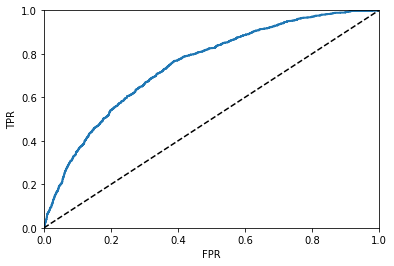

In [55]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score

anal_result = []
m = [1000, 1500, 2000, 2500, 3000]
c = [0.01, 0.1, 1, 10, 100]

for i in m:
    model = LogisticRegression(random_state = 42, solver = 'lbfgs', max_iter = i)
    results = model.fit(X_under2_train,Y_under2_train)
    
    #로지스틱 모형 적합
    model = sm.Logit(Y_under2_train,X_under2_train)
    results = model.fit()

    pred_y = results.predict(test_x)
    pred_Y = cut_off(pred_y, 0.5)

    cfmat = confusion_matrix(test_y,pred_Y)
    accuracy = acc(cfmat)

    pr = precision_score(test_y,pred_Y)
    r = recall_score(test_y,pred_Y)
    f1= f1_score(test_y,pred_Y)
    auc_score = roc_auc_score(test_y,pred_y)
    
    anal_result.append((i, accuracy, cfmat, pr, r, f1, auc_score))

In [33]:
model = LogisticRegression()
results = model.fit(X_under2_train,Y_under2_train)
model = sm.Logit(Y_under2_train,X_under2_train)
results = model.fit()
pred_y = results.predict(test_x)
pred_Y = cut_off(pred_y, 0.5)
cfmat = confusion_matrix(test_y,pred_Y)
print(cfmat)
print(classification_report(test_y, pred_Y, target_names=['사고보증', '정상보증']))

Optimization terminated successfully.
         Current function value: 0.312741
         Iterations 7
[[   66  1004]
 [  155 10511]]
              precision    recall  f1-score   support

        사고보증       0.30      0.06      0.10      1070
        정상보증       0.91      0.99      0.95     10666

    accuracy                           0.90     11736
   macro avg       0.61      0.52      0.52     11736
weighted avg       0.86      0.90      0.87     11736



In [ ]:
print(anal_result)

# 혼합샘플링

1. SMOTEENN

In [57]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score

anal_result = []
m = [1000, 1500, 2000, 2500, 3000]
c = [0.01, 0.1, 1, 10, 100]

for i in m:
    model = LogisticRegression(random_state = 42, solver = 'lbfgs', max_iter = i)
    results = model.fit(X_comb1_train,Y_comb1_train)
    
    #로지스틱 모형 적합
    model = sm.Logit(Y_comb1_train,X_comb1_train)
    results = model.fit()

    pred_y = results.predict(test_x)
    pred_Y = cut_off(pred_y, 0.5)

    cfmat = confusion_matrix(test_y,pred_Y)
    accuracy = acc(cfmat)

    pr = precision_score(test_y,pred_Y)
    r = recall_score(test_y,pred_Y)
    f1= f1_score(test_y,pred_Y)
    auc_score = roc_auc_score(test_y,pred_y)
    
    anal_result.append((i, accuracy, cfmat, pr, r, f1, auc_score))

35620    0.562487
13304    0.605198
38803    0.894126
8618     0.527672
36794    0.884854
           ...   
4064     0.652166
7401     0.043432
28336    0.016551
34226    0.215665
22837    0.032817
Length: 11736, dtype: float64


In [34]:
model = LogisticRegression()
results = model.fit(X_comb1_train,Y_comb1_train)
model = sm.Logit(Y_comb1_train,X_comb1_train)
results = model.fit()
pred_y = results.predict(test_x)
pred_Y = cut_off(pred_y, 0.5)
cfmat = confusion_matrix(test_y,pred_Y)
print(cfmat)
print(classification_report(test_y, pred_Y, target_names=['사고보증', '정상보증']))

Optimization terminated successfully.
         Current function value: 0.503193
         Iterations 7
[[ 870  200]
 [4792 5874]]
              precision    recall  f1-score   support

        사고보증       0.15      0.81      0.26      1070
        정상보증       0.97      0.55      0.70     10666

    accuracy                           0.57     11736
   macro avg       0.56      0.68      0.48     11736
weighted avg       0.89      0.57      0.66     11736



In [58]:
print(anal_result)

35620    1
13304    1
38803    1
8618     1
36794    1
        ..
4064     1
7401     0
28336    0
34226    0
22837    0
Length: 11736, dtype: int32

2. SMOTETomek

In [63]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score

anal_result = []
m = [1000, 1500, 2000, 2500, 3000]
c = [0.01, 0.1, 1, 10, 100]

for i in m:
    model = LogisticRegression(random_state = 42, solver = 'lbfgs', max_iter = i)
    results = model.fit(X_comb2_train,Y_comb2_train)
    
    #로지스틱 모형 적합
    model = sm.Logit(Y_comb2_train,X_comb2_train)
    results = model.fit()

    pred_y = results.predict(test_x)
    pred_Y = cut_off(pred_y, 0.5)

    cfmat = confusion_matrix(test_y,pred_Y)
    accuracy = acc(cfmat)

    pr = precision_score(test_y,pred_Y)
    r = recall_score(test_y,pred_Y)
    f1= f1_score(test_y,pred_Y)
    auc_score = roc_auc_score(test_y,pred_y)
    
    anal_result.append((i, accuracy, cfmat, pr, r, f1, auc_score))

Optimization terminated successfully.
         Current function value: 0.601275
         Iterations 5


In [35]:
model = LogisticRegression()
results = model.fit(X_comb2_train,Y_comb2_train)
model = sm.Logit(Y_comb2_train,X_comb2_train)
results = model.fit()
pred_y = results.predict(test_x)
pred_Y = cut_off(pred_y, 0.5)
cfmat = confusion_matrix(test_y,pred_Y)
print(cfmat)
print(classification_report(test_y, pred_Y, target_names=['사고보증', '정상보증']))

Optimization terminated successfully.
         Current function value: 0.582487
         Iterations 6
[[ 767  303]
 [3559 7107]]
              precision    recall  f1-score   support

        사고보증       0.18      0.72      0.28      1070
        정상보증       0.96      0.67      0.79     10666

    accuracy                           0.67     11736
   macro avg       0.57      0.69      0.54     11736
weighted avg       0.89      0.67      0.74     11736



In [65]:
print(anal_result)

35620    1
13304    1
38803    1
8618     1
36794    1
        ..
4064     1
7401     0
28336    0
34226    0
22837    0
Length: 11736, dtype: int32